In [11]:
library(fields)
library(rasterImage)

List of files 

In [12]:
files<-c('~/Desktop/out053018/1.rda','~/Desktop/out053018/2.rda','~/Desktop/out053018/3.rda','~/Desktop/out053018/4.rda','~/Desktop/out053018/5.rda','~/Desktop/out053018/6.rda','~/Desktop/out053018/8.rda','~/Desktop/out053018/9.rda','~/Desktop/out053018/10.rda','~/Desktop/out053018/11.rda','~/Desktop/out070718/1.rda','~/Desktop/out070718/2.rda','~/Desktop/out070718/3.rda','~/Desktop/out070718/4.rda','~/Desktop/out070718/5.rda','~/Desktop/out070718/6.rda','~/Desktop/out070718/7.rda','~/Desktop/out070718/8.rda','~/Desktop/out070718/9.rda','~/Desktop/out070718/10.rda','~/Desktop/out070718/11.rda','~/Desktop/out070718/12.rda')

In [21]:
files<-c('~/Desktop/out053018/1.rda','~/Desktop/out053018/2.rda','~/Desktop/out053018/3.rda','~/Desktop/out053018/4.rda','~/Desktop/out053018/5.rda','~/Desktop/out053018/8.rda','~/Desktop/out053018/9.rda','~/Desktop/out053018/10.rda','~/Desktop/out053018/11.rda','~/Desktop/out070718/1.rda','~/Desktop/out070718/2.rda','~/Desktop/out070718/3.rda','~/Desktop/out070718/4.rda','~/Desktop/out070718/5.rda','~/Desktop/out070718/6.rda','~/Desktop/out070718/7.rda','~/Desktop/out070718/9.rda','~/Desktop/out070718/10.rda','~/Desktop/out070718/11.rda','~/Desktop/out070718/12.rda')

Get population size over time for each simulation (25x22)

In [22]:
N<-c()
for (i in files) {
    
    load(i)
    N <- append(N,nclsot)
    
}

In [23]:
length(N)

[1] 500

Get average trajectory over 10 simulations for each parameter combination (25 combinations)

In [24]:
N_arc <- N
N <- simplify2array(N)
N_av <- matrix(data=NA,nrow=17,ncol=25)
for (j in 1:25) {
    for (i in 1:17) {

        N_av[i,j] <- mean(N[i,seq(1,500,25)+(j-1)])

    }
}

Plot averaged trajectories for each parameter combination

In [79]:
pdf('trajectories_passenger.pdf')
colscheme = c("green2","turquoise3","steelblue3","grey","black")
plot(tail(N_av[,1],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.07),xaxt='n',ylab='Normalized Population Size',xlab='Generation')
# plot(tail(nclsot[[1]],n=13))
cols = c(rep(colscheme,5))
for (i in 1:25) {
    lines(tail(N_av[,i],n=13)/(2^c(4:16)),col=cols[i],xaxt='n')
}
axis(1, at = seq(1,13,1),labels=seq(5,17,1))
legend(1, 1.07, legend=c("Sp = 0.0", "Sp = 0.25", "Sp = 0.5", "Sp = 0.75", "Sp = 1.0"),
       col=c("green2","turquoise3","steelblue3","grey","black"), lty=1, cex=0.8)
dev.off()

png 
  2

In [80]:
pdf('trajectories_driver.pdf')
colscheme = c("green2","turquoise3","steelblue3","grey","black")
plot(tail(N_av[,1],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.07),xaxt='n',ylab='Normalized Population Size',xlab='Generation')
# plot(tail(nclsot[[1]],n=13))
# cols = c(rep(colscheme,5))
cols = c(rep("green2",5),rep("turquoise3",5),rep("steelblue3",5),rep("grey",5),rep("black",5))

for (i in 1:25) {
    lines(tail(N_av[,i],n=13)/(2^c(4:16)),col=cols[i],xaxt='n')
}
axis(1, at = seq(1,13,1),labels=seq(5,17,1))
legend(1, 1.07, legend=c("Sd = 0.0", "Sd = 0.25", "Sd = 0.5", "Sd = 0.75", "Sd = 1.0"),
       col=c("green2","turquoise3","steelblue3","grey","black"), lty=1, cex=0.8)
dev.off()

png 
  2

In [36]:
Nt<-c()
for (i in files) {
    
    load(i)
    Nt <- append(Nt,nclst)
    
}

In [37]:
Nt <- matrix(Nt,nrow=20,ncol=25,byrow=TRUE)

In [57]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [72]:
Ntav <- c()
Ntstd <- c()
for (i in 1:25) {
    Ntav[i] <- median(unlist(Nt[,i]))
#     Ntav[i] <- mean(unlist(Nt[,i]))
    Ntstd[i] <- sd(unlist(Nt[,i]))
}

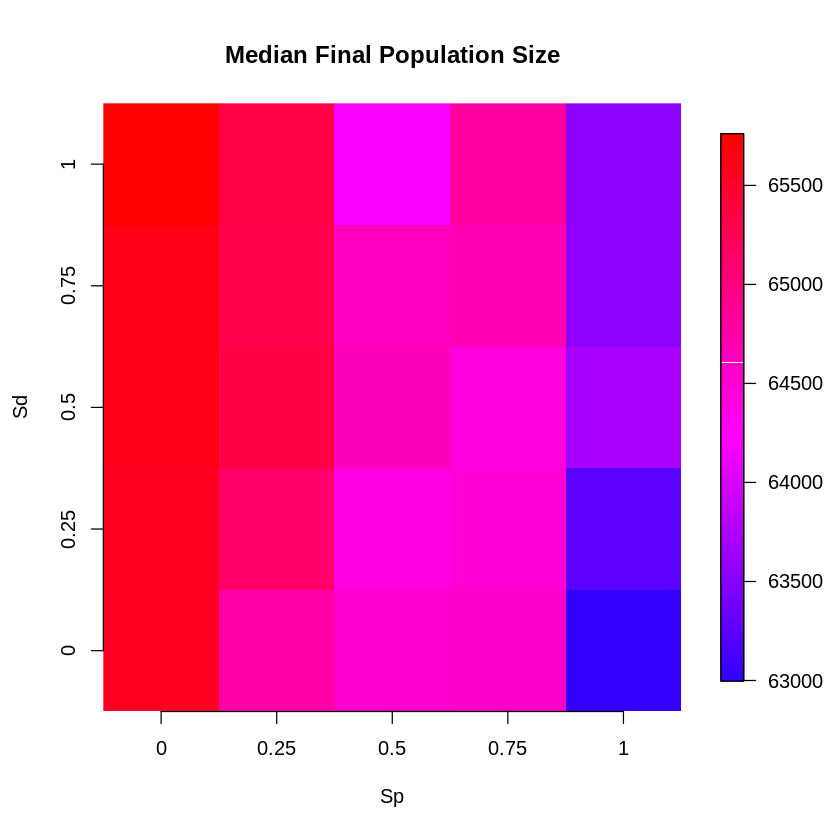

In [74]:
# pdf('rasterPopSize.pdf')
rotate <- function(x) t(apply(x, 2, rev))
n=256
cols = rainbow(n, s = 1, v = 1, start = 0.7, end = 0, alpha = 1)
image.plot(rotate(apply(matrix(Ntav[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F,col=cols)

title(main="Median Final Population Size",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.25,0.5,0.75,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.25,0.5,0.75,1.0)); 
# dev.off()